<h1><font color="green"> Cassava Leaf Disease Classification - Exploratory Data Analysis </font></h1>
<img src = "EDA_Images/Bg_img.jpg"> </img>
<h3> Problem Statement </h3>
<p>
As the second-largest provider of carbohydrates in Africa, cassava is a key food security crop grown by smallholder farmers because it can withstand harsh conditions. At least 80% of household farms in Sub-Saharan Africa grow this starchy root, but viral diseases are major sources of poor yields. With the help of data science, it may be possible to identify common diseases so they can be treated.

Existing methods of disease detection require farmers to solicit the help of government-funded agricultural experts to visually inspect and diagnose the plants. This suffers from being labor-intensive, low-supply and costly. As an added challenge, effective solutions for farmers must perform well under significant constraints, since African farmers may only have access to mobile-quality cameras with low-bandwidth.
</p>
<h2> Table of Contents: </b>
<ol>
<li>Loading Data</li>
<li>Data Summarization</li>
<li>Data Visualisation</li>
<li>Summary</li>
</ol>
<h2> Loading Data </h2>

In [45]:
#Importing Libraries
import pandas as pd #to handle csv files as dataframe
import numpy as np #Linear Algebra and numerical computations
import matplotlib.pyplot as plt #Plotting Graphs
import os #to handle paths of directories and images
import json #to handle json file
from PIL import Image

In [3]:
#Exploring label json file to understand various labels to be classified
labels_file = open("Data/label_num_to_disease_map.json")
labels = json.load(labels_file)
for i in labels:
    print(labels[i]," has label in Dataset as:",i)
#print(labels)

Cassava Bacterial Blight (CBB)  has label in Dataset as: 0
Cassava Brown Streak Disease (CBSD)  has label in Dataset as: 1
Cassava Green Mottle (CGM)  has label in Dataset as: 2
Cassava Mosaic Disease (CMD)  has label in Dataset as: 3
Healthy  has label in Dataset as: 4


<h3><font color="#90EE90">Cassava Bacterial Blight (CBB): </font></h3>
<p>Cassava (Manihot esculenta Crantz) with its long life cycle is affected by several diseases of which cassava bacterial blight (CBB) is the major bacterial disease in the cassava belt worldwide.the causal agent, the bacterium <b>Xanthomonas axonopodis pv. manihotis (Xam)</b>, possesses several means for survival and dissemination that may play an important role as inoculum sources for the infection when favorable conditions occur, and the subsequent damage of the plant causing severe yield losses.</p>
<img src="EDA_Images/CBB.jpeg" height = 130 width =430></img>
<br>
<h3><font color="#90EE90">Cassava Brown Streak Disease (CBSD): </font></h3>
<p>Cassava brown streak disease (CBSD) was first reported in Eastern Africa during the 1930s and causes up to 70% losses in cassava root yields. Typical CBSD symptoms are <b>leaf chlorosis, brown streaks on stems and dry hard rot in roots</b> thus affecting both the quality and quantity of edible storage roots.</p>
<img src="EDA_Images/CBSD.jpeg" height = 130 width =430></img>
<br>
<h3><font color="#90EE90">Cassava Green Mottle (CGM): </font></h3>
<p>Cassava green mottle virus (CGMV) is a plant pathogenic virus of the family Secoviridae. Look for <b>deformed young leaves with faint or distinct yellow spots or green
patches.</b></p>
<img src="EDA_Images/CGM.jpeg" height = 130 width =430></img>
<br>
<h3><font color="#90EE90">Cassava Mosaic Disease (CMD): </font></h3>
<p>Cassava mosaic disease (CMD) is primarily spread through the dissemination of stem cuttings (A) obtained from cassava plants affected by the disease. Secondary spread can occur within and between fields through the activities of the whitefly vector Bemisia tabaci </p>
<br>
<img src="EDA_Images/CMD.jpeg" height = 130 width =430></img>
<h3><font color="#90EE90">Healthy: </font></h3>
<p>The Plant is Healthy without any diseases. </p>
<br>
<img src="EDA_Images/Healthy.png" height = 130 width =430></img>
<h4> No of Samples in Each Label </h4>

No of Samples in Each Label is: 3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64


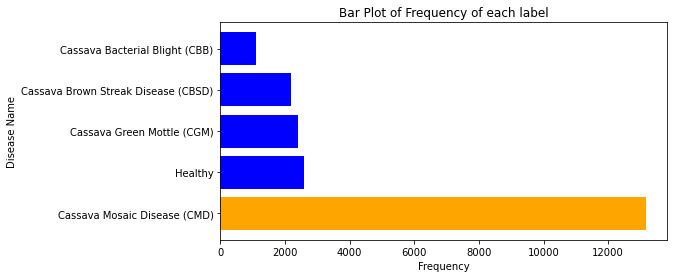

In [62]:
df_train = pd.read_csv("Data/train.csv")
counts = df_train["label"].value_counts()

print("No of Samples in Each Label is:",counts)

xticks = []
for i in counts.index.to_list():
    xticks.append(labels[str(i)])

plt.figure(figsize=(8,4))
plt.barh(xticks,counts.to_list(),color=["orange","blue","blue","blue","blue"])
plt.ylabel("Disease Name")
plt.xlabel("Frequency")
plt.title("Bar Plot of Frequency of each label")
plt.show()



<h5> Inference: </h5>
<ol>
<li> Class label 3: Cassava Mosaic Disease is Majority with 13,000+ samples.</li>
<li> Rest of the labels are almost the same except label 0. </li>
<li> We need to upsample the remaining class by <b>Data Augmentation</b></li>
</ol>

<h3> One Image from each class </h3>

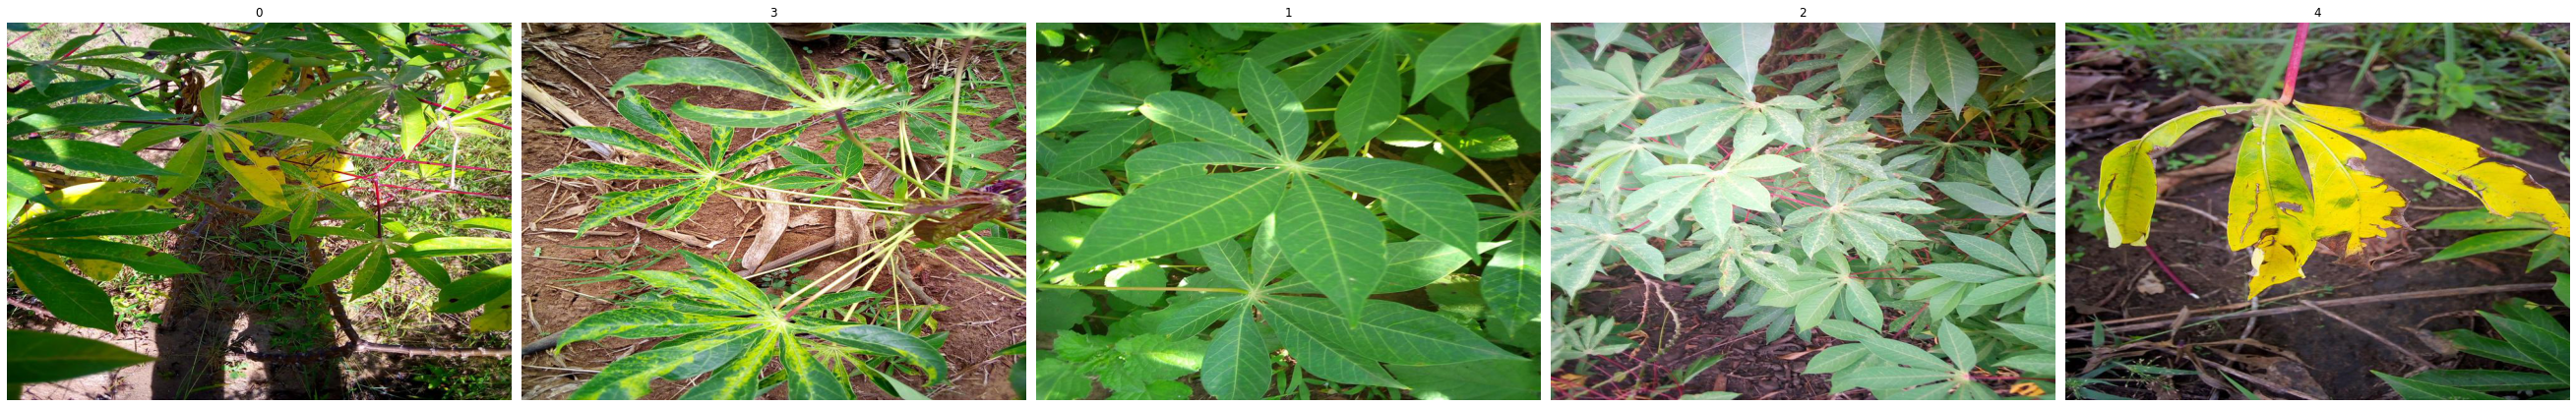

In [53]:
#Drawing 5 samples one from each category to validate Images in Train Image Directory
plt.figure(figsize=(51,312))
for id,i in enumerate(df_train.label.unique()): #getting unique labels [0,1,2,3,4]
    plt.subplot(4,7,id+1)
    df = df_train.loc[df_train['label']==i].reset_index(drop=True) #each Iteration filtering label i
    image_path = df.loc[0,'image_id'] #choosing the first record for displaying
    image_path = "Data/train_images/" + image_path
    img = Image.open(image_path)
    plt.imshow(img) #Displaying Image
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

<h4> Size of Each Image</h4>

In [56]:
sample_path = "Data/train_images/" + df_train.loc[0,'image_id']
sample_img = Image.open(sample_path)
print("The size of the image is: ",sample_img.size)

The size of the image is:  (800, 600)


<h4> No of Train Images </h4>

In [58]:
input_files = os.listdir(os.path.join("Data/", "train_images"))
print(f"Number of train images: {len(input_files)}")

Number of train images: 21397


<h4> Array Representation of Sample Image</h4>

In [68]:
sample_array_img = np.array(sample_img)
print("Dimensions of Image:",3)
print(sample_array_img)

Dimensions of Image: 3
[[[ 32  89 118]
  [ 33  88 118]
  [ 36  90 118]
  ...
  [138 166 125]
  [ 74 100  71]
  [ 60  85  63]]

 [[ 32  88 115]
  [ 34  88 114]
  [ 35  89 115]
  ...
  [ 47  70  41]
  [ 28  50  27]
  [ 43  65  44]]

 [[ 32  87 108]
  [ 33  88 109]
  [ 36  88 109]
  ...
  [ 40  56  19]
  [ 59  76  32]
  [ 86 103  58]]

 ...

 [[ 13  49   1]
  [ 12  48   0]
  [ 12  48   0]
  ...
  [ 70  83  27]
  [ 79  92  38]
  [ 84  99  44]]

 [[ 13  49   1]
  [ 12  48   0]
  [ 14  47   0]
  ...
  [ 79  92  38]
  [ 76  89  36]
  [ 76  89  36]]

 [[ 15  48   1]
  [ 14  47   0]
  [ 14  47   0]
  ...
  [ 83  93  41]
  [ 66  76  26]
  [ 58  67  20]]]
